# Plot all results -F1, std- found in a user specified folder


In [15]:
#passive learning results
pl_results = dict()
pl_results['musicbrainz20K_mutated'] = 0.942
pl_results['musicbrainz20K'] = 0.966
pl_results['lspc_computers_mutated'] = 0.91
pl_results['lspc_computers'] = 0.95
pl_results['magellan_restaurants'] = 0.93


magellan_restaurants
3_runs_200_iter_disagreement_16_01_02_10


,F1_micro,F1_micro_std,F1_macro,F1_macro_std
50,0.917,0.006,0.923,0.010
100,0.925,0.002,0.932,0.005
120,0.925,0.003,0.931,0.003
149,0.926,0.001,0.934,0.002
199,0.927,0.001,0.935,0.002


3_runs_200_iter_disagreement_post_graph_21_01_19_30


,F1_model_micro_boost_graph,F1_micro_std,F1_macro,F1_macro_std
50,0.924,0.004,0.928,0.004
100,0.931,0.003,0.932,0.002
120,0.931,0.000,0.936,0.001
149,0.932,0.001,0.936,0.002
199,0.931,0.001,0.935,0.001


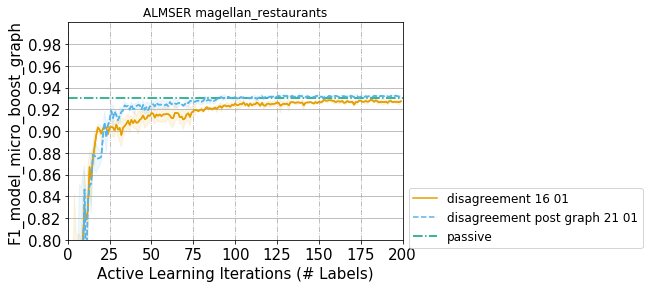

In [16]:
# Plot Results MICRO or MACRO F1
import matplotlib.pyplot as plt
from displayutils import *
import numpy as np
import pandas as pd
from os.path import isfile, join
from os import listdir

task = "magellan_restaurants"
results_folder = "../datasets/"+task+"/almser/plot/"
main_results_type = 'F1_micro'    
fig, ax = plt.subplots()

result_files = [f for f in sorted(listdir(results_folder)) if isfile(join(results_folder, f))]

handles = []
colors = ["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
linestyles = ["-", "--", "-.", ":", "-", "--", "-."]

print(task)

if (len(result_files)>len(colors)): 
    print("You want to plot more results that provided colors and linestyles. Please add.")
for i in range(0,len(result_files)):
    if ('post_graph' in result_files[i]): results_type = 'F1_model_micro_boost_graph'
    else: results_type = main_results_type
    
    print(result_files[i].replace('.csv', ''))
    results = pd.read_csv(results_folder+result_files[i])
    #display(results.iloc[::10, : ])
    display(results.iloc[[50, 100, 120, 149, 199], : ][[results_type,'F1_micro_std','F1_macro','F1_macro_std']].round(3))
    query_num = np.arange(0,results.shape[0])
    label_name_parts = result_files[i].replace('.csv', '').split("_")
    label_name = ' '.join(label_name_parts[4:len(label_name_parts)-2])
    f1_plt, = ax.plot(results[results_type], color=colors[i], linestyle=linestyles[i], label=label_name)
    errorfill(query_num, results[results_type].values, results[results_type+'_std'].values, color=colors[i], linestyle=linestyles[i])
    handles.append(f1_plt)
#passive learning result
pas = ax.hlines(pl_results.get(task),0,200, color=colors[i+1], linestyle=linestyles[i+1], label='passive')
handles.append(pas)
ax.grid(True)
gridlines = ax.get_xgridlines()
for line in gridlines:
    line.set_linestyle('-.')
ax.set_xlabel("Active Learning Iterations (# Labels)", fontsize=15)
ax.set_ylabel(results_type, fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(np.arange(0.0, 1.0, step=0.02), fontsize=15)

 

ax.legend(loc='center left', bbox_to_anchor=(1, 0.1),handles=handles, fontsize=12)
plt.axis([0,200,0.8,1.0])

plt.title("ALMSER %s" %task)
plt.show()

